### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [63]:
data = pd.read_csv('data/coupons.csv')

In [64]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [65]:
#print all null values in the dataframe 'data'
print(data.isnull().sum())
#check for duplicates
print(data.duplicated().sum())
#view duplicates
data[data.duplicated(keep=False)]
#check for outliers in numberical columns
data.describe()
#Get info on the dataframe on how many rows with non-null values
data.info()
#look at values for each column for any discrepencies
for column in data.columns:
  print(column)
  print(data[column].value_counts())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
74
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  --

3. Decide what to do about your missing data -- drop, replace, other...

In [66]:
#drop duplicate rows
df_unique = data.drop_duplicates()
#drop the car column as there are too many NULLs and there is no decision making on that column that is needed
df_with_null = df_unique.drop('car', axis=1)
#drop the NAN values related rows from all columns. This is okay because that is only 10% of rows and won't effect the analysis.
df_cleaned = df_with_null.dropna()
df_cleaned.info()
# we are keeping the Null value dataframe to see if any analysis does not depend on those columns, then we can use that dataframe.

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [67]:
#Since the 'Y' column does not have any NULL we can 'df_with_null' dataframe to get proportion.Duplicates are removed
percentages = df_with_null['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentages

Y
1    56.8%
0    43.2%
Name: proportion, dtype: object

5. Use a bar plot to visualize the `coupon` column.

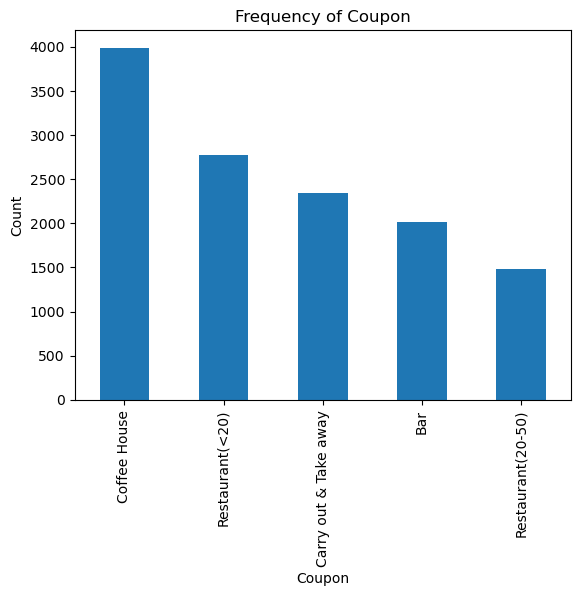

<Figure size 640x480 with 0 Axes>

In [68]:
    #Use the dataframe with no duplicates
    # Get the frequency of each category
    category_counts = df_with_null['coupon'].value_counts()

    # Plot the bar chart
    category_counts.plot(kind='bar')
    # set title and labels
    plt.title('Frequency of Coupon')
    plt.xlabel('Coupon')
    plt.ylabel('Count')
    plt.show()
    #same the image
    plt.savefig('images/coupon_plot.png')



6. Use a histogram to visualize the temperature column.

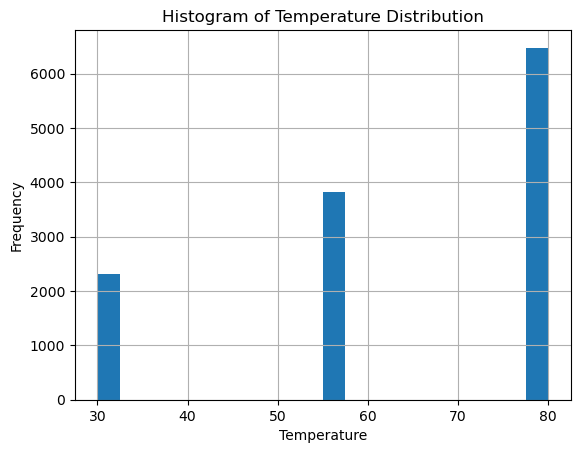

In [69]:
#Use the dataframe with no duplicates
df_with_null['temperature'].hist(bins=20)
# Add a title and labels for clarity (optional)
plt.title('Histogram of Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
#Get the rows with "Bar" value for coupon
df_bar =  df_with_null[df_with_null['coupon'] == 'Bar']
#we take unique values, as our decision making will be influenced in this case
df_bar_unique = df_bar.dropna()
df_bar_unique.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null   obj

2. What proportion of bar coupons were accepted?


In [71]:
#Since the 'Y' column does not have any NULL we can 'df_with_null' dataframe to get proportion.Duplicates are removed
percentages_bar = df_bar_unique['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentages_bar

Y
0    58.8%
1    41.2%
Name: proportion, dtype: object

Roughly 41% of the folks accepted the bar coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [72]:
#rows with less than three bar going people.
df_bar_less_than_three = df_bar_unique[(df_bar_unique['Bar'] == 'never')|(df_bar_unique['Bar'] == 'less1')|(df_bar_unique['Bar'] == '1~3')]
#acceptance rate
percentages_bar_less_than_three = df_bar_less_than_three['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_bar_less_than_three)
#this code does negative of above logic to get all rows with more than three bar going people
df_bar_more_than_three = df_bar_unique[~((df_bar_unique['Bar'] == 'never')|(df_bar_unique['Bar'] == 'less1')|(df_bar_unique['Bar'] == '1~3'))]
#acceptance rate
percentages_bar_more_than_three = df_bar_more_than_three['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_bar_more_than_three)

Y
0    62.8%
1    37.2%
Name: proportion, dtype: object
Y
1    76.2%
0    23.8%
Name: proportion, dtype: object


The number of people would went to bar few than 3 times has less acceptance of the bar coupon. Specifically only 37% accepted. Of the people who went more than 3 times 76% accepted the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [73]:
#bar more than once a month
df_bar_more_than_once = df_bar_unique[~((df_bar_unique['Bar'] == 'never')|(df_bar_unique['Bar'] == 'less1'))]
#And it with below 25
df_bar_more_than_once_below_25 = df_bar_more_than_once[(df_bar_more_than_once['age'] == '21') |(df_bar_more_than_once['age'] == 'below21')]
#find more than 25
df_bar_more_than_once_above_25 = df_bar_more_than_once[~((df_bar_more_than_once['age'] == '21') |(df_bar_more_than_once['age'] == 'below21'))]
#calculate percentages
percentages_df_bar_more_than_once_below_25 = df_bar_more_than_once_below_25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentages_df_bar_more_than_once_above_25 = df_bar_more_than_once_above_25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_df_bar_more_than_once_below_25)
print(percentages_df_bar_more_than_once_above_25)


Y
1    67.5%
0    32.5%
Name: proportion, dtype: object
Y
1    69.0%
0    31.0%
Name: proportion, dtype: object


People who went to bar more than once and below 25 are 67% likely to accept the coupon.  People who went to bar more than once and above 25 are 69% likely to accept the coupon. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [74]:

#bar more than once a month
df_bar_more_than_once = df_bar_unique[~((df_bar_unique['Bar'] == 'never')|(df_bar_unique['Bar'] == 'less1'))]
#not a kid
df_bar_more_than_once_not_a_kid = df_bar_more_than_once[~(df_bar_more_than_once['passanger'] == 'Kid(s)')]
#occupation logic added
df_bar_more_than_once_not_a_kid_occ = df_bar_more_than_once[~((df_bar_more_than_once['occupation'] == 'Farming Fishing & Forestry'))]
#calculate percentages
percentages_df_bar_more_than_once_not_a_kid_occ = df_bar_more_than_once_not_a_kid_occ['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentages_df_bar_more_than_once_not_a_kid_occ


Y
1    68.5%
0    31.5%
Name: proportion, dtype: object

68% of the folks accepted the coupon when the passenger was not a kid and they go to bar more than once a month.



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [75]:
#- go to bars more than once a month, had passengers that were not a kid, and were not widowed 
df_bar_more_than_once_not_a_kid_widowed = df_bar_more_than_once_not_a_kid[~(df_bar_more_than_once_not_a_kid['maritalStatus'] == 'Widowed')]
#this gives insight into first logic
df_bar_eval1 = df_bar_more_than_once_not_a_kid_widowed['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(df_bar_eval1)
#- go to bars more than once a month and are under the age of 30 
df_bar_more_than_once_below_30 = df_bar_more_than_once[(df_bar_more_than_once['age'] == '26')|(df_bar_more_than_once['age'] == '21') |(df_bar_more_than_once['age'] == 'below21')]
#this gives insight into second logic
df_bar_eval2 = df_bar_more_than_once_below_30['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(df_bar_eval2)
#- go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurant = df_bar_unique[(df_bar_unique['RestaurantLessThan20'] == '4~8')|(df_bar_unique['RestaurantLessThan20'] == 'gt8')]
income_greater_than_50k = cheap_restaurant[(cheap_restaurant['income'] == '$25000 - $37499')|(cheap_restaurant['income'] == '$37500 - $49999')|(cheap_restaurant['income'] == 'Less than $12500')|(cheap_restaurant['income'] == '$12500 - $24999')]
#this gives insight into third logic
df_bar_eval3 = income_greater_than_50k['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(df_bar_eval3)
merged_df = pd.merge(df_bar_more_than_once_not_a_kid_widowed, df_bar_more_than_once_below_30, how='outer')
merged_df_final = pd.merge(merged_df, income_greater_than_50k, how='outer')
#final OR all the conditions.
df_bar_eval_final = merged_df_final['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(df_bar_eval_final)

Y
1    70.9%
0    29.1%
Name: proportion, dtype: object
Y
1    72.0%
0    28.0%
Name: proportion, dtype: object
Y
0    54.4%
1    45.6%
Name: proportion, dtype: object
Y
1    58.7%
0    41.3%
Name: proportion, dtype: object


58% folks accepted the coupon when they go to bar once a month, even if they go to cheap restaurants and income is less than 50k. This means if someone is going to the bar once a month and they are given a coupon they will likely take it.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

If someone goes to the bar more than 3 times a month, they are very likely to accept the coupon. Other factors don't play as much of a role.
If the passenger is not a kid they are more likely to accept the coupon
The number of people would went to bar few than 3 times has less acceptance of the bar coupon. Specifically only 37% accepted. Of the people who went more than 3 times 76% accepted the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [76]:
#Get the rows with "Bar" value for coupon
df_coffee =  df_with_null[df_with_null['coupon'] == 'Coffee House']
#we take unique values, as our decision making will be influenced in this case
df_coffee_unique = df_coffee.dropna()
df_coffee_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3809 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3809 non-null   object
 1   passanger             3809 non-null   object
 2   weather               3809 non-null   object
 3   temperature           3809 non-null   int64 
 4   time                  3809 non-null   object
 5   coupon                3809 non-null   object
 6   expiration            3809 non-null   object
 7   gender                3809 non-null   object
 8   age                   3809 non-null   object
 9   maritalStatus         3809 non-null   object
 10  has_children          3809 non-null   int64 
 11  education             3809 non-null   object
 12  occupation            3809 non-null   object
 13  income                3809 non-null   object
 14  Bar                   3809 non-null   object
 15  CoffeeHouse           3809 non-null   obj

In [77]:
#Since the 'Y' column does not have any NULL we can 'df_with_null' dataframe to get proportion.Duplicates are removed
percentages_coffee = df_coffee_unique['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentages_coffee

Y
0    50.4%
1    49.6%
Name: proportion, dtype: object

In [78]:
#Compare the acceptance rate between those who went to a Coffee 3 or fewer times a month to those who went more.
#rows with less than three coffee going people.
df_coffee_less_than_three = df_coffee_unique[(df_coffee_unique['CoffeeHouse'] == 'never')|(df_coffee_unique['CoffeeHouse'] == 'less1')|(df_coffee_unique['CoffeeHouse'] == '1~3')]
#acceptance rate
percentages_coffee_less_than_three = df_coffee_less_than_three['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_coffee_less_than_three)
#this code does negative of above logic to get all rows with more than three coffee going people
df_coffee_more_than_three = df_coffee_unique[~((df_coffee_unique['CoffeeHouse'] == 'never')|(df_coffee_unique['CoffeeHouse'] == 'less1')|(df_coffee_unique['CoffeeHouse'] == '1~3'))]
#acceptance rate
percentage_df_coffee_more_than_three = df_coffee_more_than_three['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentage_df_coffee_more_than_three)

Y
0    55.5%
1    44.5%
Name: proportion, dtype: object
Y
1    67.3%
0    32.7%
Name: proportion, dtype: object


In [79]:
#Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others.  Is there a difference?

df_coffee_more_than_once = df_coffee_unique[~((df_coffee_unique['CoffeeHouse'] == 'never')|(df_coffee_unique['CoffeeHouse'] == 'less1'))]
df_coffee_more_than_once_below_25 = df_coffee_more_than_once[(df_coffee_more_than_once['age'] == '21') |(df_coffee_more_than_once['age'] == 'below21')]
percentages_df_coffee_more_than_once_below_25 = df_coffee_more_than_once_below_25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_df_coffee_more_than_once_below_25)
df_coffee_more_than_once_above_25 = df_coffee_more_than_once[~((df_coffee_more_than_once['age'] == '21') |(df_coffee_more_than_once['age'] == 'below21'))]
percentages_df_coffee_more_than_once_above_25 = df_coffee_more_than_once_above_25['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_df_coffee_more_than_once_above_25)


Y
1    70.8%
0    29.2%
Name: proportion, dtype: object
Y
1    63.9%
0    36.1%
Name: proportion, dtype: object


In [80]:
#Use the same process to compare the acceptance rate between drivers who go to Coffee House eq or more than once a month and age above 25 and 
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

df_coffee_more_than_once = df_coffee_unique[~((df_coffee_unique['CoffeeHouse'] == 'never')|(df_coffee_unique['CoffeeHouse'] == 'less1'))]
df_coffee_more_than_once_not_a_kid = df_coffee_more_than_once[~(df_coffee_more_than_once['passanger'] == 'Kid(s)')]
df_coffee_more_than_once_not_a_kid_occ = df_coffee_more_than_once[~((df_coffee_more_than_once['occupation'] == 'Farming Fishing & Forestry'))]
percentage_df_coffee_more_than_once_not_a_kid_occ = df_coffee_more_than_once_not_a_kid_occ['Y'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percentage_df_coffee_more_than_once_not_a_kid_occ


Y
1    65.9%
0    34.1%
Name: proportion, dtype: object

In [81]:
#Observations:
#Coupon acceptance is 50% if we look at all data
#If folks go to the coffee shop more than 3 times they are very likely to accept the coupon.
#This is true for all ages even though younger people accept the coupon more than older than 25
#If the passager is not a kid and they go to coffee shop folks have high likelyhood that they will accept the coupon.